# TP 1 Mohamed Amine Mansori

In [6]:
#import modules
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

### Definir la Variable distance_to_next_Car

In [55]:
Distance_to_next_Car = ctrl.Antecedent(np.arange(0, 31, 1), 'distance_to_next_Car')

## Definir les 5 ensembles floues suivantes:
### Distance_to_next_Car {v_small,small,perfect,big,v_big}

In [56]:
Distance_to_next_Car['v_small'] = fuzz.trapmf(Distance_to_next_Car.universe, [0, 0, 2, 6])
Distance_to_next_Car['small'] = fuzz.trimf(Distance_to_next_Car.universe, [5, 9, 14])
Distance_to_next_Car['perfect'] = fuzz.trimf(Distance_to_next_Car.universe, [11, 15, 19])
Distance_to_next_Car['big'] = fuzz.trimf(Distance_to_next_Car.universe, [17, 21, 25])
Distance_to_next_Car['v_big'] = fuzz.trapmf(Distance_to_next_Car.universe, [22, 24, 30, 30])

# Visualisation

c:\Python312\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


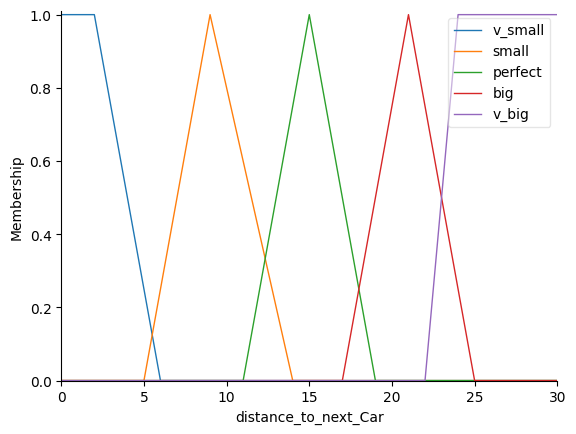

In [57]:
Distance_to_next_Car.view()

### Definir la Variable Speed_change

In [66]:
Speed_change = ctrl.Antecedent(np.arange(-20, 21, 0.1), 'Speed_change')

## Definir les 3 ensembles floues suivantes:
### Speed_change {declining,constant,growing}

In [67]:
Speed_change['declining'] = fuzz.trimf(Speed_change.universe, [-20, -10, 2])
Speed_change['constant'] = fuzz.trapmf(Speed_change.universe, [-3, -1, 1, 3])
Speed_change['growing'] = fuzz.trimf(Speed_change.universe, [2, 10, 20])

# Visualisation

c:\Python312\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


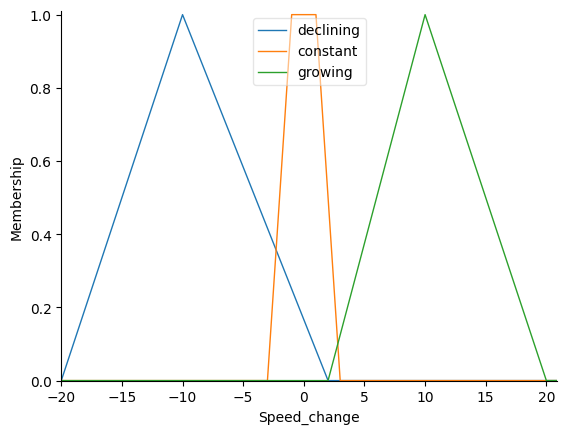

In [68]:
Speed_change.view()

### Definir la Variable Acceleration

In [69]:
Acceleration = ctrl.Consequent(np.arange(-3, 4, 0.1), 'acceleration_adjust')

## Definir les 5 ensembles floues suivantes:
**neg_big (forte décélération),**

**neg_small (faible décélération),**

**zero (aucune variation),**

**pos_small (faible accélération),**

**pos_big (forte accélération).**

In [70]:
Acceleration['neg_big']   = fuzz.trapmf(Acceleration.universe, [-3, -3, -2.2, -1.2])
Acceleration['neg_small'] = fuzz.trimf(Acceleration.universe, [-2.0, -1.0, -0.2])
Acceleration['zero']      = fuzz.trimf(Acceleration.universe, [-0.5, 0.0, 0.5])
Acceleration['pos_small'] = fuzz.trimf(Acceleration.universe, [0.2, 1.0, 2.0])
Acceleration['pos_big']   = fuzz.trapmf(Acceleration.universe, [1.2,2.0,3.0,3.0])

# *Visualisation*

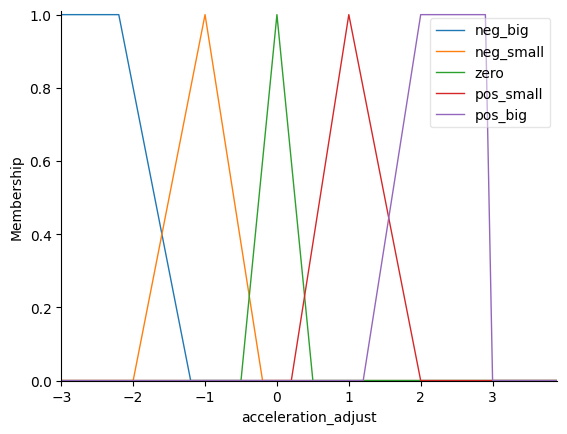

In [71]:
Acceleration.view()

## Definir les regles

In [72]:
# rules
r1  = ctrl.Rule(Distance_to_next_Car['v_small'] & Speed_change['declining'], Acceleration['neg_small'])
r2  = ctrl.Rule(Distance_to_next_Car['v_small'] & Speed_change['constant'],  Acceleration['neg_big'])
r3  = ctrl.Rule(Distance_to_next_Car['v_small'] & Speed_change['growing'],   Acceleration['neg_big'])

r4  = ctrl.Rule(Distance_to_next_Car['small']   & Speed_change['declining'], Acceleration['zero'])
r5  = ctrl.Rule(Distance_to_next_Car['small']   & Speed_change['constant'],  Acceleration['neg_small'])
r6  = ctrl.Rule(Distance_to_next_Car['small']   & Speed_change['growing'],   Acceleration['neg_big'])

r7  = ctrl.Rule(Distance_to_next_Car['perfect'] & Speed_change['declining'], Acceleration['pos_small'])
r8  = ctrl.Rule(Distance_to_next_Car['perfect'] & Speed_change['constant'],  Acceleration['zero'])
r9  = ctrl.Rule(Distance_to_next_Car['perfect'] & Speed_change['growing'],   Acceleration['neg_small'])

r10 = ctrl.Rule(Distance_to_next_Car['big']     & Speed_change['declining'], Acceleration['pos_big'])
r11 = ctrl.Rule(Distance_to_next_Car['big']     & Speed_change['constant'],  Acceleration['pos_small'])
r12 = ctrl.Rule(Distance_to_next_Car['big']     & Speed_change['growing'],   Acceleration['zero'])

r13 = ctrl.Rule(Distance_to_next_Car['v_big']   & Speed_change['declining'], Acceleration['pos_big'])
r14 = ctrl.Rule(Distance_to_next_Car['v_big']   & Speed_change['constant'],  Acceleration['pos_big'])
r15 = ctrl.Rule(Distance_to_next_Car['v_big']   & Speed_change['growing'],   Acceleration['pos_small'])

accelertion_ctrl = ctrl.ControlSystem([r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15])

accelertion_simulation = ctrl.ControlSystemSimulation(accelertion_ctrl)

*Les valeurs de test pour une sortie de l'acceleration*

In [73]:
accelertion_simulation.input['distance_to_next_Car'] = 13
accelertion_simulation.input['Speed_change'] = -2.5

*Calcule de la valeur de sortie pour les entrees:*

In [76]:
accelertion_simulation.compute()
print(accelertion_simulation.output['acceleration_adjust'])

0.23500611060189444


*Visualisation des valeurs:*

c:\Python312\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


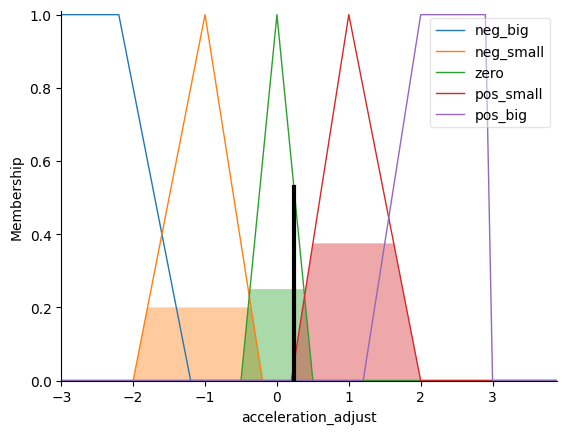

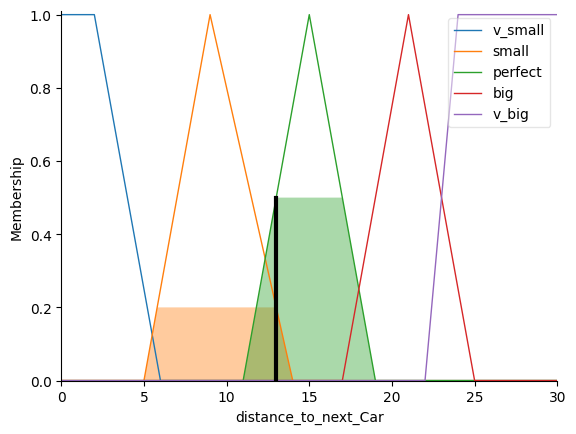

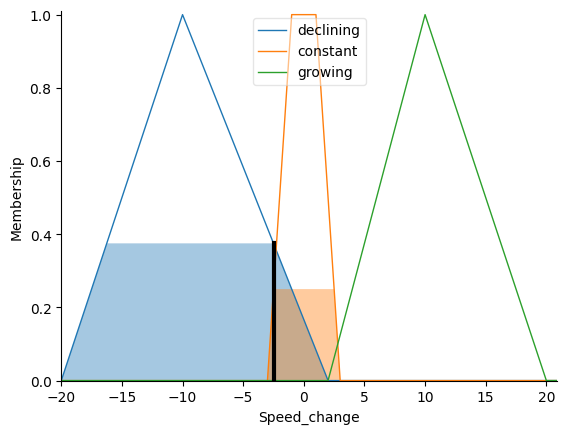

In [78]:
Acceleration.view(sim=accelertion_simulation)
Distance_to_next_Car.view(sim=accelertion_simulation)
Speed_change.view(sim=accelertion_simulation)

# Modele ML pour la prediction

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Gerer le dataset et choix du modele

In [86]:
np.random.seed(42)
n_samples = 1000

distances = np.random.uniform(0, 30, n_samples)
speed_changes = np.random.uniform(-20, 20, n_samples)

accelerations = []
for d, s in zip(distances, speed_changes):
    accelertion_simulation.input['distance_to_next_Car'] = d
    accelertion_simulation.input['Speed_change'] = s
    accelertion_simulation.compute()
    accelerations.append(accelertion_simulation.output['acceleration_adjust'])


X = np.column_stack([distances, speed_changes])
y = np.array(accelerations)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Resultats de l'evaluation du modele ML :")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {np.sqrt(mse):.4f}")

Resultats de l'evaluation du modele ML :
MAE: 0.0251
MSE: 0.0033
RMSE: 0.0574


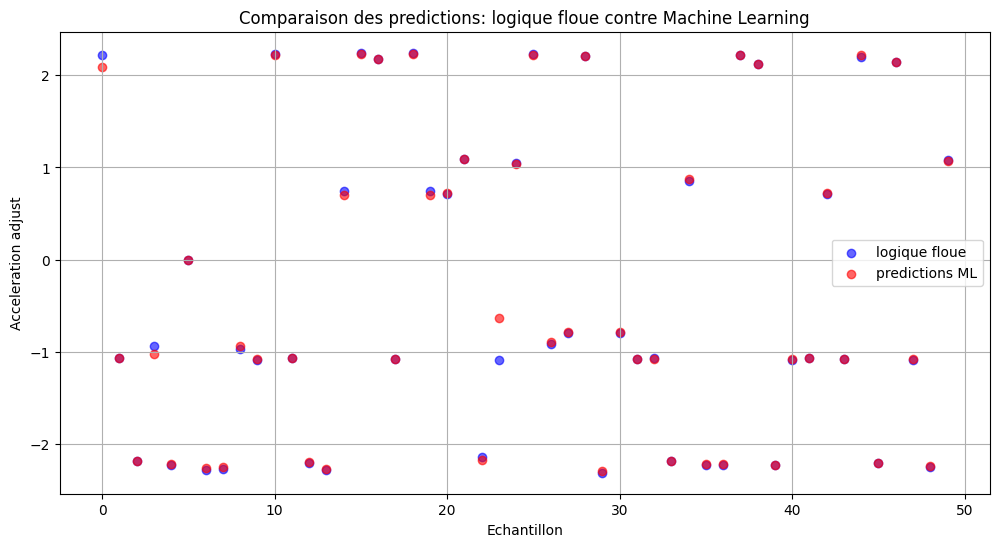

In [85]:
plt.figure(figsize=(12, 6))

sample_indices = np.random.choice(len(X_test), size=50)
X_sample = X_test[sample_indices]
y_true_sample = y_test[sample_indices]
y_pred_sample = y_pred[sample_indices]

plt.scatter(range(len(y_true_sample)), y_true_sample, label='logique floue', color='blue', alpha=0.6)
plt.scatter(range(len(y_pred_sample)), y_pred_sample, label='predictions ML', color='red', alpha=0.6)
plt.xlabel('Echantillon')
plt.ylabel('Acceleration adjust')
plt.title('Comparaison des predictions: logique floue contre Machine Learning')
plt.legend()
plt.grid(True)
plt.show()

# Comparaison entre logique floue et Machine Learning

## Avantages de la logique floue (Explicabilite) :
1. **Interpretabilite** : Les regles sont clairement definies et comprehensibles par les humains
2. **Expertise humaine** : Integre directement la connaissance des experts dans le systeme
3. **Robustesse** : Fonctionne bien meme avec des donnees imprecises ou incertaines

## Avantages du Machine Learning (Precision) :
1. **Precision** : Comme montre par les metriques (MAE, MSE), le modele ML peut capturer des patterns complexes
2. **Automatisation** : Pas besoin de definir manuellement les regles
3. **Performance** : Peut traiter un grand nombre de variables d'entree efficacement

Le choix entre les deux approches depend du contexte :
- Si l'explicabilite est cruciale (securite, réglementation), preferer la logique floue
- Si la precision et l'adaptabilité sont prioritaires, opter pour le ML